In [1]:
import torch

# Tensors definition

In [2]:
#NUmber
t1 = torch.tensor(4.)
t1

tensor(4.)

In [3]:
t1.dtype

torch.float32

In [4]:
#Vector
t2 = torch.tensor([2,4.,5,6])
t2

tensor([2., 4., 5., 6.])

In [5]:
#matrix
t3 = torch.tensor([[5,6],[7,8],[8,9]])
t3

tensor([[5, 6],
        [7, 8],
        [8, 9]])

In [6]:
# 3-dimensional array
t4 = torch.tensor([
    [[11,12,13],
    [13,14,15]],
    [
        [15,16,17],
        [17,18,19]
    ]
])
t4

tensor([[[11, 12, 13],
         [13, 14, 15]],

        [[15, 16, 17],
         [17, 18, 19]]])

In [7]:
t1.shape

torch.Size([])

In [8]:
t2.shape

torch.Size([4])

In [9]:
t3.shape

torch.Size([3, 2])

In [10]:
t4.shape

torch.Size([2, 2, 3])

# Tensors Operations and Gradients

In [11]:
#Create  tensors
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [12]:
#Arithmetic Operations
y = w*x+b
y

tensor(17., grad_fn=<AddBackward0>)

In [13]:
#Compute derivatives
y.backward()

In [14]:
#Display Gradients
print('dy/dx:',x.grad)
print('dy/dw:',w.grad)
print('dy/db:',b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


# Interoperability with Numpy

In [15]:
import numpy as np

x = np.array([[1,2],[3,4.]])
x

array([[1., 2.],
       [3., 4.]])

In [16]:
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [17]:
x. dtype, y.dtype

(dtype('float64'), torch.float64)

In [18]:
#Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

# Linear Regression

In [19]:
import numpy as np
import torch

In [20]:
#IMput (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [21]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [22]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


# Model from scratch

In [23]:
# Weigths and biases
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[-1.4993, -0.1012,  1.4514],
        [-0.7927,  0.0725, -0.3685]], requires_grad=True)
tensor([-0.6860, -0.0030], requires_grad=True)


In [24]:
def model(x):
    return x @ w.t() + b

In [25]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ -54.5079,  -68.8594],
        [ -53.1416,  -89.3442],
        [ -60.5095,  -80.6277],
        [-104.2675,  -91.3771],
        [ -12.2576,  -73.5354]], grad_fn=<AddBackward0>)


In [26]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


# Loss function

In [27]:
## MSE Loss
def mse(preds,targets):
    diff = preds-targets
    return torch.sum(diff*diff) / diff.numel()

In [28]:
# Compute loss
loss = mse(preds,targets)
print(loss)

tensor(24635.7695, grad_fn=<DivBackward0>)


## Compute gradients

In [29]:
# Compute gradients
loss.backward()

In [30]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-1.4993, -0.1012,  1.4514],
        [-0.7927,  0.0725, -0.3685]], requires_grad=True)
tensor([[-11344.6719, -11951.4014,  -7297.6782],
        [-14484.6182, -15736.7217,  -9754.1660]])


In [31]:
print(b)
print(b.grad)

tensor([-0.6860, -0.0030], requires_grad=True)
tensor([-133.1369, -172.7488])


In [32]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# Adjust weights and biases using gradient descent

In [33]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ -54.5079,  -68.8594],
        [ -53.1416,  -89.3442],
        [ -60.5095,  -80.6277],
        [-104.2675,  -91.3771],
        [ -12.2576,  -73.5354]], grad_fn=<AddBackward0>)


In [34]:
#Calculate the loss
loss = mse(preds,targets)
print(loss)

tensor(24635.7695, grad_fn=<DivBackward0>)


In [35]:
#Cumpute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-11344.6719, -11951.4014,  -7297.6782],
        [-14484.6182, -15736.7217,  -9754.1660]])
tensor([-133.1369, -172.7488])


In [36]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad*1e-5
    b -= b.grad*1e-5
    w.grad.zero_()
    b.grad.zero_()

In [37]:
print(w)
print(b)

tensor([[-1.3859,  0.0183,  1.5244],
        [-0.6479,  0.2299, -0.2709]], requires_grad=True)
tensor([-0.6847, -0.0013], requires_grad=True)


In [38]:
#Calculate the loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor(16647.0977, grad_fn=<DivBackward0>)


In [39]:
# Train for 100 mepochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds,targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad*1e-5
        b -= b.grad*1e-5
        w.grad.zero_()
        b.grad.zero_()

In [40]:
#Calculate the loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor(97.2578, grad_fn=<DivBackward0>)


In [41]:
preds

tensor([[ 54.9928,  71.7326],
        [ 89.2982,  96.3685],
        [106.0555, 140.4533],
        [  9.9780,  44.7528],
        [120.6026, 107.1402]], grad_fn=<AddBackward0>)

In [42]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Linear regression using Pytorch built-ins

In [43]:
import torch.nn as nn

In [44]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

In [45]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

## Dataset and DataLoader

In [46]:
from torch.utils.data import TensorDataset

In [47]:
#Define dataset
train_ds = TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [48]:
from torch.utils.data import DataLoader

In [49]:
#Define data loader
batch_size = 5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [50]:
for xb,yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[102.,  43.,  37.],
        [101.,  44.,  37.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [ 69.,  96.,  70.]])
tensor([[ 22.,  37.],
        [ 21.,  38.],
        [ 81., 101.],
        [119., 133.],
        [103., 119.]])


In [51]:
# Define model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.5162,  0.5298,  0.2337],
        [-0.1024, -0.2086,  0.5006]], requires_grad=True)
Parameter containing:
tensor([-0.0052,  0.1355], requires_grad=True)


In [52]:
#Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5162,  0.5298,  0.2337],
         [-0.1024, -0.2086,  0.5006]], requires_grad=True),
 Parameter containing:
 tensor([-0.0052,  0.1355], requires_grad=True)]

In [53]:
#Generate predictions
preds = model(inputs)
preds

tensor([[ 83.2245,   0.2100],
        [108.5503,   4.4985],
        [129.4540,  -7.6906],
        [ 84.0764,  -0.7565],
        [102.8348,   8.0857],
        [ 83.2109,   0.3162],
        [108.2542,   5.2076],
        [130.2040,  -7.2924],
        [ 84.0900,  -0.8627],
        [102.5524,   8.6886],
        [ 82.9284,   0.9191],
        [108.5367,   4.6047],
        [129.7501,  -8.3997],
        [ 84.3589,  -1.3594],
        [102.8484,   7.9795]], grad_fn=<AddmmBackward0>)

## Loss function

In [54]:
#Import nn.functional
import torch.nn.functional as F

In [55]:
#Define loss function
loss_fn = F.mse_loss

In [56]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(5316.6729, grad_fn=<MseLossBackward0>)


## Optimizer

In [57]:
#Define the optimizer
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

## Train the model



1. Generate predictions

2. Calculate the loss

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero


In [58]:
#Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, traind_dl):
    
    #Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        #Train with batches of data
        for xb, yb in train_dl:
            
            #Step 1
            pred = model(xb)
            
            #Step 2
            loss = loss_fn(pred,yb)
            
            #Step 3
            loss.backward()
            
            #Step 4
            opt.step()
            
            #Step 5
            opt.zero_grad()
            
            #Print progress
            if (epoch+1) % 10 == 0:
                print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [59]:
fit(100,model,loss_fn,opt,train_dl)

Epoch [10/100], Loss: 351.5147
Epoch [10/100], Loss: 186.6185
Epoch [10/100], Loss: 573.9868
Epoch [20/100], Loss: 230.8962
Epoch [20/100], Loss: 321.1614
Epoch [20/100], Loss: 204.7675
Epoch [30/100], Loss: 200.0093
Epoch [30/100], Loss: 143.4113
Epoch [30/100], Loss: 171.9238
Epoch [40/100], Loss: 144.8358
Epoch [40/100], Loss: 119.8803
Epoch [40/100], Loss: 94.3689
Epoch [50/100], Loss: 118.8424
Epoch [50/100], Loss: 73.6427
Epoch [50/100], Loss: 70.8614
Epoch [60/100], Loss: 64.4791
Epoch [60/100], Loss: 82.1458
Epoch [60/100], Loss: 36.3662
Epoch [70/100], Loss: 25.3449
Epoch [70/100], Loss: 58.1417
Epoch [70/100], Loss: 49.4490
Epoch [80/100], Loss: 50.6582
Epoch [80/100], Loss: 13.6633
Epoch [80/100], Loss: 31.7958
Epoch [90/100], Loss: 12.4582
Epoch [90/100], Loss: 47.6212
Epoch [90/100], Loss: 13.8708
Epoch [100/100], Loss: 18.1489
Epoch [100/100], Loss: 16.7932
Epoch [100/100], Loss: 22.5603


In [60]:
preds = model(inputs)
preds

tensor([[ 58.2039,  71.3018],
        [ 80.1638, 101.0028],
        [119.8954, 129.8856],
        [ 28.2611,  43.1904],
        [ 94.3027, 116.1920],
        [ 57.0900,  70.3852],
        [ 79.6223, 101.1374],
        [120.0194, 130.5494],
        [ 29.3750,  44.1070],
        [ 94.8751, 117.2432],
        [ 57.6625,  71.4363],
        [ 79.0499, 100.0862],
        [120.4368, 129.7511],
        [ 27.6887,  42.1393],
        [ 95.4166, 117.1086]], grad_fn=<AddmmBackward0>)

In [61]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

# Logistic Regresion

In [62]:
#Imports
import torchvision
from torchvision.datasets import MNIST

In [65]:
#Download trainig dataset
dataset =MNIST(root='./data', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [66]:
len(dataset)

60000

In [67]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [68]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F5789707790>, 5)

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


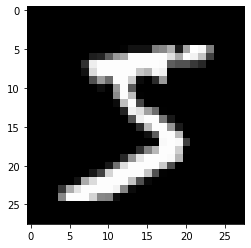

In [71]:
image, label =dataset[0]
plt.imshow(image,cmap='gray')
print('Label: ',label)

Label:  3


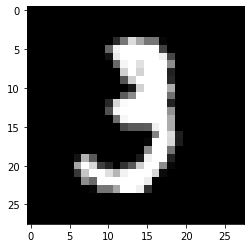

In [72]:
image, label =dataset[10]
plt.imshow(image,cmap='gray')
print('Label: ',label)

In [74]:
import torchvision.transforms as transforms

In [75]:
#MNIST dataset (images and labels)
dataset = MNIST(root='data/',
               train=True,
               transform=transforms.ToTensor())

In [76]:
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [77]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


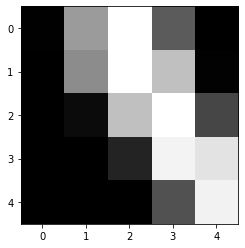

In [79]:
#Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

## Trainig and Validation Datasets

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.
